# **Création et déploiement d'un classificateur d'images chat-chien à l'aide de TensorFlow et Streamlit**

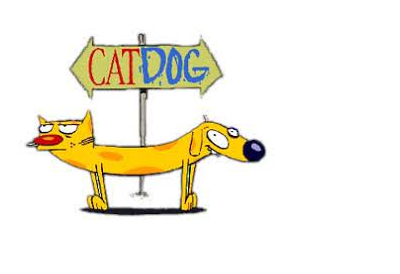

- **This is what we will build at the end :**

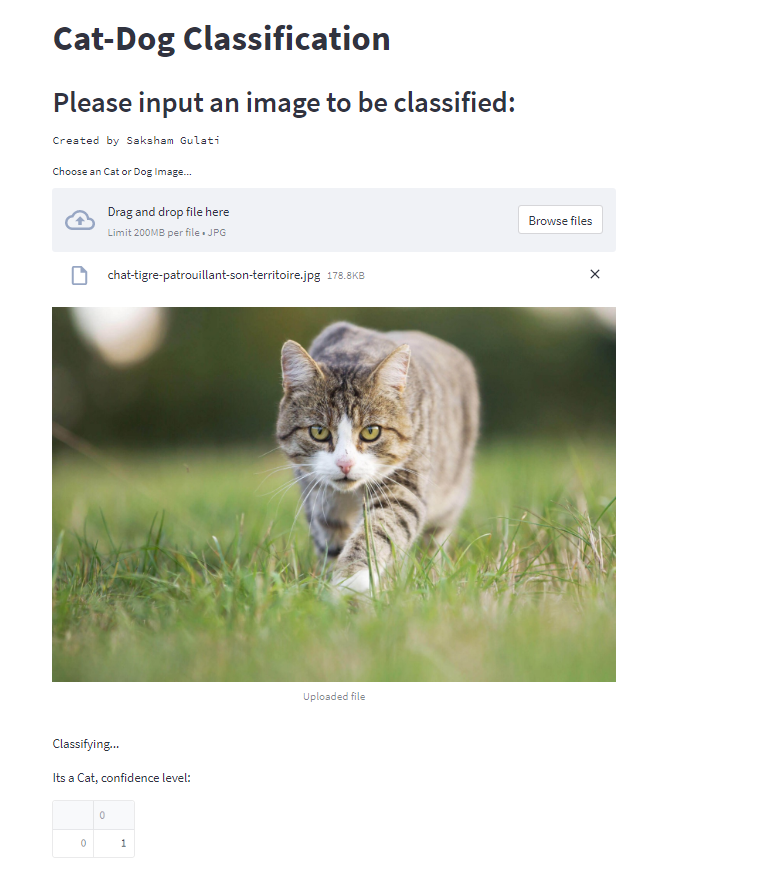

## Importer la data depuis Kaggle


In [1]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
! cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d tongpython/cat-and-dog

 99% 216M/218M [00:03<00:00, 130MB/s]
100% 218M/218M [00:03<00:00, 67.4MB/s]


In [13]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [14]:
import PIL
print('Pillow Version:', PIL.__version__)

from PIL import Image

Pillow Version: 7.1.2


In [17]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

uint8
(499, 421, 3)


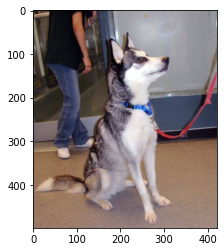

In [19]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread(r'/content/test_set/test_set/dogs/dog.4001.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

### Typical steps for loading custom dataset for Deep Learning Models
* Open the image file. The format of the file can be JPEG, PNG, BMP, etc.
* Resize the image to match the input size for the Input layer of the Deep Learning model.
* Convert the image pixels to float datatype.
* Normalize the image to have pixel values scaled down between 0 and 1 from 0 to 255.
* Image data for Deep Learning models should be either a numpy array or a tensor object.

In [20]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

(219, 275, 3)
(374, 500, 3)
(375, 499, 3)
(374, 500, 3)
(375, 499, 3)


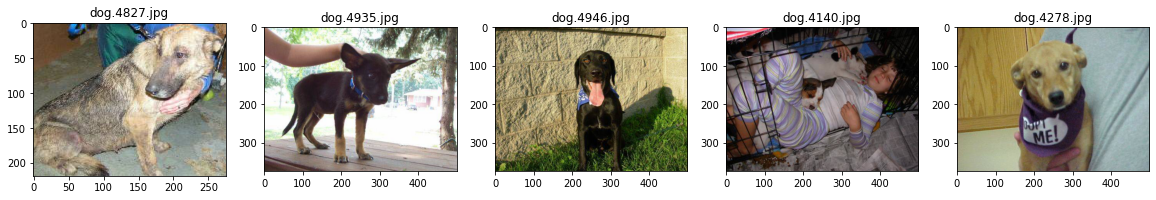

In [21]:
plt.figure(figsize=(20,20))
test_folder=r'/content/test_set/test_set/dogs'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    print(img.shape)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

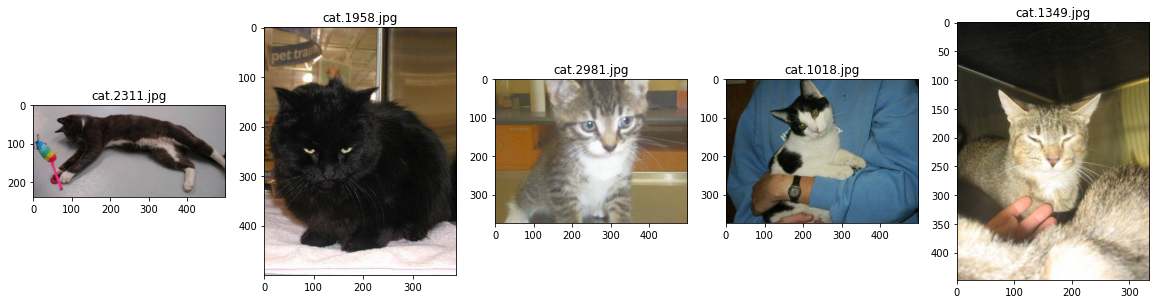

In [22]:
plt.figure(figsize=(20,20))
test_folder=r'/content/training_set/training_set/cats'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [24]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'/content/training_set/training_set'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
    
    for dir1 in os.listdir(img_folder):
        print("Collecting images for: ",dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            try:
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            except:
                break
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [25]:
img_data=np.array(img_data)
class_name=np.array(class_name)
img_data.shape

(489, 200, 200, 3)

In [26]:
def dog_cat_mapping(a):
    if a=="dogs":
        return 1
    else:return 0
class_name=list(map(dog_cat_mapping,class_name))
class_name=np.array(class_name)


In [27]:
input_shape=img_data.shape[1:]
input_shape

(200, 200, 3)

In [28]:
from tensorflow.keras.applications import InceptionResNetV2
conv_base=InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(200,200,3))

219055592/219055592 [==============================] - 1s 0us/step


In [29]:
def model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    model=Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    return model
#The Accuracy is: 0.898204

In [30]:
model=model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 4, 4, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 24576)             0         
                                                                 
 dense (Dense)               (None, 256)               6291712   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 60,628,705
Trainable params: 60,568,161
Non-trainable params: 60,544
_______________________________________

In [31]:
conv_base.trainable=False
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x=img_data,y=class_name, epochs=5)

Epoch 1/5
16/16 [==============================] - 108s 6s/step - loss: 2.3853 - accuracy: 0.8957
Epoch 2/5
16/16 [==============================] - 96s 6s/step - loss: 0.2257 - accuracy: 0.9857
Epoch 3/5
16/16 [==============================] - 97s 6s/step - loss: 0.2292 - accuracy: 0.9918
Epoch 4/5
16/16 [==============================] - 99s 6s/step - loss: 0.0262 - accuracy: 0.9959
Epoch 5/5
16/16 [==============================] - 97s 6s/step - loss: 0.0049 - accuracy: 0.9980


## **Data Ingestion**
now we need to create a function which takes goes into our directory, goes into the folders and transforms our images into a dataframe of required shape and size for keras to work its magic on

In [33]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'/content/test_set/test_set'


# extract the image array and class name
img_data_test, class_name_test =create_dataset(r'/content/test_set/test_set')

In [34]:
img_data_test=np.array(img_data_test)
class_name_test=list(map(dog_cat_mapping,class_name_test))
class_name_test=np.array(class_name_test)
preds=model.predict(img_data_test).round().astype(int)
flat_pred = [item for sublist in preds for item in sublist]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(class_name_test, flat_pred)
print("The Accuracy is: %2f" % accuracy)

5/5 [==============================] - 40s 7s/step
The Accuracy is: 0.973684


In [35]:
incorrects = np.nonzero(model.predict(img_data_test).round().astype(int).reshape((-1,)) != class_name_test)

5/5 [==============================] - 29s 5s/step


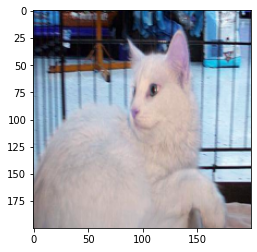

In [36]:
#incorrects- 7,71,84 etc.

plt.imshow(img_data_test[7])

In [37]:
from keras.models import load_model

model.save('catdog.h5')  # creates a HDF5 file 'my_model.h5'
from keras.models import save_model
#model = save_model(model,'/cat_dog.h5')
IMG_WIDTH=20
IMG_HEIGHT=200
#img_folder='C:\Users\saksh\Downloads\test_set\test_set'


In [38]:
model.save('./models_catdog', save_format='tf')

In [39]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=07eaa7b18536310cc2271e2db047f1f823441462fca30f1da5e75a2b2e8667a5
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [40]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [56]:

%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

st.title("Cat-Dog Classification")
st.header("Please input an image to be classified:")
st.text("Created by Saksham Gulati")



def teachable_machine_classification(img, weights_file):
    # Load the model
    model = keras.models.load_model(weights_file)

    # Create the array of the right shape to feed into the keras model
    data = np.ndarray(shape=(1, 200, 200, 3), dtype=np.float32)
    image = img
    #image sizing
    size = (200, 200)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    #turn the image into a numpy array
    image_array = np.asarray(image)
    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 255)

    # Load the image into the array
    data[0] = normalized_image_array

    # run the inference
    prediction_percentage = model.predict(data)
    prediction=prediction_percentage.round()
    
    return  prediction,prediction_percentage


uploaded_file = st.file_uploader("Choose an Cat or Dog Image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded file', use_column_width=True)
    st.write("")
    st.write("Classifying...")
    label,perc = teachable_machine_classification(image, 'catdog.h5')
    if label == 1:
        st.write("Its a Dog, confidence level:",perc)
    else:
        st.write("Its a Cat, confidence level:",1-perc)

Overwriting app.py


In [57]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.259s
your url is: https://public-ducks-write-35-237-179-134.loca.lt
